In [1]:
# Face recognition by Santiago Serrano
# http://www.pages.drexel.edu/~sis26/Eigencode.htm
# Modified by Eric Salathe 
from numpy import (
    linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e, 
    ones, arange, zeros, real, imag, sign, shape, dot, size,
    mean
    )

from numpy.random import rand

from matplotlib.pyplot import (
    plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout, stem, pcolormesh,
    get_cmap
    )   
from scipy.io import loadmat




## Read in the image database
This fills an 96x64x40  array called  pics where each 96x64 layer is a
picture and there are 40 pictures (layers). 
The first pictur is pics[:,:,0]
To make  picture number i into a single column vector, use
X=pics[:,:,i].reshape((row*col,))

In [2]:
# read in images

infile=loadmat('Faces.mat')
pics = infile['pics']

row, col, mpictot = shape(pics) # image size
npixel = row*col # total pixels in each image

## Read in the EigenFaces

The set of eigen faces $\vec u_i$  form a basis for our
vector space of faces. Only the top few eigenfaces are necesary
to represent the dataset, and we can flatten the vector space -- reduce it's dimensions.

In [2]:
infile=loadmat('EigenFaces.mat')
u=infile['u']
nn, meig = shape(u) # meig is the number of eigen vectors in our basis

## Image Atlas

Read in  40  images
Each image contains  6144  pixels


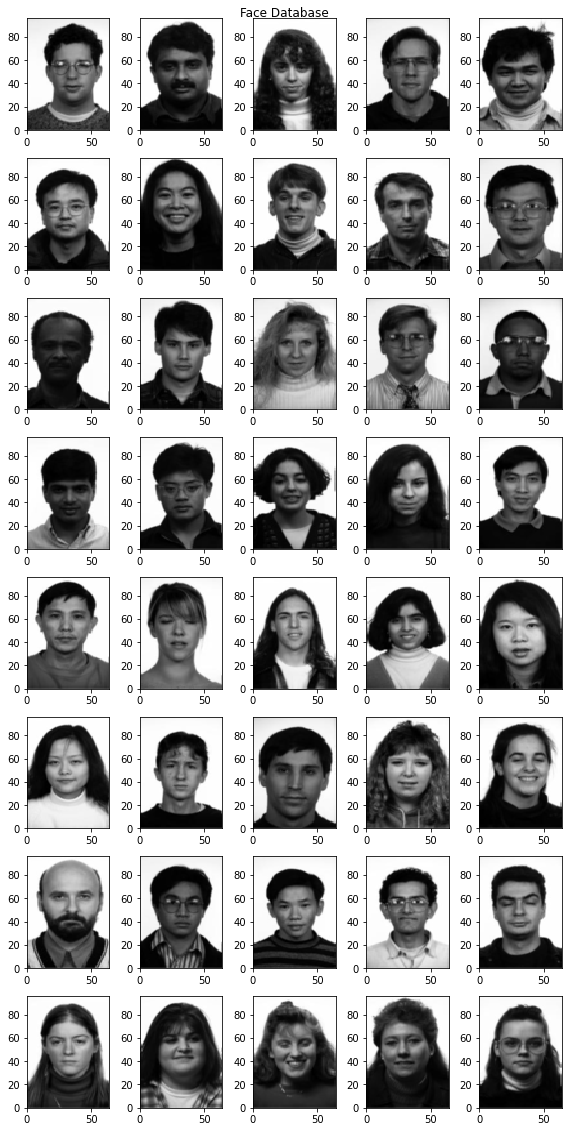

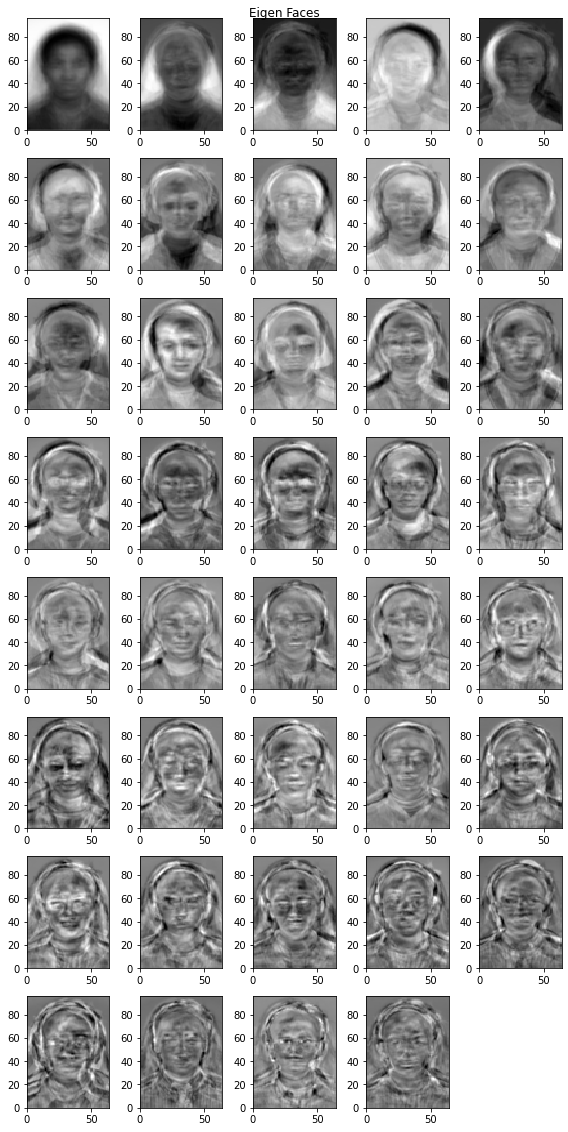

In [23]:
print('Read in ',mpictot,' images')
print('Each image contains ',npixel,' pixels')

# plot all the faces, 5 to a row

fig=figure(1, figsize=[8,16])
cmap=get_cmap('gray')
figcol=5
figrow=int(mpictot/figcol)
for i in range(mpictot):
    subplot(figrow, figcol, i+1)
    pcolormesh(pics[:,:,i],cmap=cmap)
fig.suptitle('Face Database')

tight_layout()

# plot all the eigen faces, 5 to a row

fig=figure(2, figsize=[8,16])
for i in range(meig):
    subplot(figrow, figcol, i+1)
    pcolormesh(u[:,i].reshape((row,col),order='F'),cmap=cmap)
fig.suptitle('Eigen Faces')
tight_layout()



## 1. Reconstruct an image in the training set using a reduced basis

In this part, selet an image $\vec x$ from the training data and see how many eigenfaces are necesary to reproduce the image.

To reconstruct the image we sum over each eigenvector (ie columns of u(:,i)) after multiplying by
the appropriate coordinate value (coord). The coordinates are found from taking the dot product between the face ($\vec x$) and the eigenfaces:

$$
\vec{X}_{rec} = \sum_{i=1}^{n} \sigma_i\vec{u}_i
$$

$$
\sigma_i = \vec{x} \cdot \vec{u}_i
$$

Xrec = sig(1)*u(1) + sig(2)*u(2) + ... + sig(n)*u(n)

where sig(i) are the coordinates and u(i) are the eigenvectors
but we use a for loop to do this in python.

You can change the selected image (i_img) and number of eigenfaces for reconstruction (m_rec).

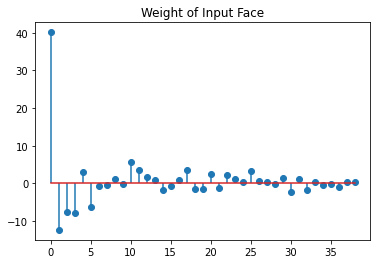

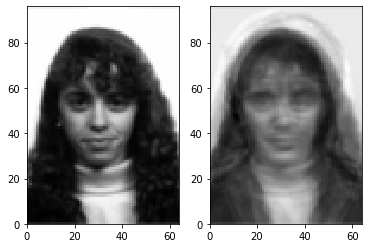

In [9]:
# Select an image from the training set onto eigen vectors
i_img = 2 # select an arbitrary image
m_rec =  15 # number of images to use for reconstruction < meig. try 10 <= m_rec <= 20


######### Don't change below here #############

picture = pics[:,:,i_img]

# put the face into a vector
X = picture.reshape((row*col,),order='F')

# get the coordinates of this face in our eigenvector space using the dot prodcuct (dot(a,b) in numpy)
#         sig_i = X•u_i

sig=zeros(meig)
### Create a for loop and compute each sig[i]
for i in range(meig):
    sig[i] = dot(X, u[:,i])


# Loop and sum over the eigenvalues
Xrec = zeros(size(X)) # all zeros and size of the original vector
### Create a for loop and sum to get Xrec
for i in range(m_rec):
    Xrec = Xrec + sig[i]*u[:,i]




# Note that if we were to take the above sum for m_rec=mpic, we'd be
# exactly inverting the computation in the earlier loop that computs the
# coordinates. By truncating the sum to fewer terms, we get an approximation. 


# plot the image coordinates
figure(1)

ll = arange(meig)
stem(ll,sig) # this makes a "stem plot"
title('Weight of Input Face') # ,'fontsize',14)

# draw the face
figure(2)
subplot(1,2,1)
cmap=get_cmap('gray')
pcolormesh(picture,cmap=cmap) 

# draw the reconstructed image.
subplot(1,2,2)
pcolormesh(Xrec.reshape((row,col),order='F'),cmap=cmap) 


## 2 Reconstruct a messed-up image 

Now we will add noise to the image and see if we can still reconstruct it. This is like recognizing and image in our training data given a poor quality or slightly different image.

You can adjust the noise level and the number of eigenfaces for reconstruction.

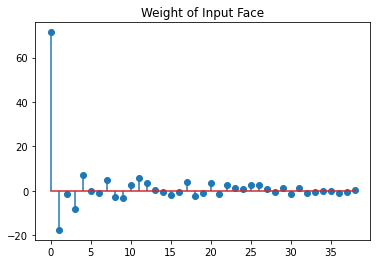

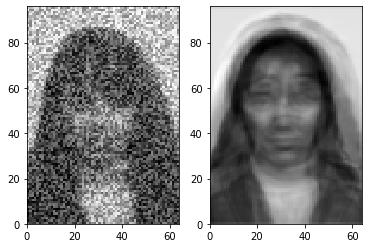

In [25]:
# Select an image and add some random speckle of specified amplitude

i_img = 2 # seclect an arbitrart image
m_rec =  15 # number of images to use for reconstruction < meig. try 10 <= m_rec <= 20
noiselevel=2 # the magnitude of the noise relative to average; try different values

######### Don't change below here #############

picture = pics[:,:,i_img] + rand(row,col) * noiselevel*mean(pics[:,:,i_img]) 

# put the face into a vector
X = picture.reshape((row*col,),order='F')

# get the coordinates of this face in our eigenvector space using the dot prodcuct (dot(a,b) in numpy)
#         sig_i = X•u_i

sig=zeros(meig)
### Create a for loop and compute each sig[i]
for i in range(meig):
    sig[i] = dot(X, u[:,i])


# Loop and sum over the eigenvalues
Xrec = zeros(size(X)) # all zeros and size of the original vector
### Create a for loop and sum to get Xrec
for i in range(m_rec):
    Xrec = Xrec + sig[i]*u[:,i]




# Note that if we were to take the above sum for m_rec=mpic, we'd be
# exactly inverting the computation in the earlier loop that computs the
# coordinates. By truncating the sum to fewer terms, we get an approximation. 


# plot the image coordinates
figure(1)

ll = arange(meig)
stem(ll,sig) # this makes a "stem plot"
title('Weight of Input Face') # ,'fontsize',14)

# draw the face
figure(2)
subplot(1,2,1)
cmap=get_cmap('gray')
pcolormesh(picture,cmap=cmap) 

# draw the reconstructed image.
subplot(1,2,2)
pcolormesh(Xrec.reshape((row,col),order='F'),cmap=cmap) 

## 3 Reconstruct an image not included in the training data
i_img=39 was not used for computing the eigen values u
see what happens if you use this image. Will any number of eigen faces reconstruct the image? What does that say about trying to identify a face when it is not in the database?

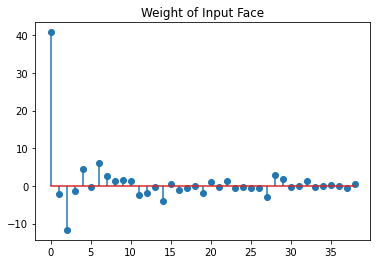

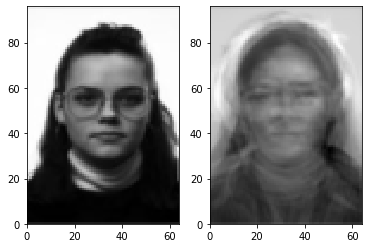

In [13]:
# Select an image from the training set onto eigen vectors
i_img = 39 # select an arbitrary image
m_rec =  15 # number of images to use for reconstruction < meig. try 10 <= m_rec <= 20


######### Don't change below here #############

picture = pics[:,:,i_img]

# put the face into a vector
X = picture.reshape((row*col,),order='F')

# get the coordinates of this face in our eigenvector space using the dot prodcuct (dot(a,b) in numpy)
#         sig_i = X•u_i

sig=zeros(meig)
### Create a for loop and compute each sig[i]
for i in range(meig):
    sig[i] = dot(X, u[:,i])


# Loop and sum over the eigenvalues
Xrec = zeros(size(X)) # all zeros and size of the original vector
### Create a for loop and sum to get Xrec
for i in range(m_rec):
    Xrec = Xrec + sig[i]*u[:,i]




# Note that if we were to take the above sum for m_rec=mpic, we'd be
# exactly inverting the computation in the earlier loop that computs the
# coordinates. By truncating the sum to fewer terms, we get an approximation. 


# plot the image coordinates
figure(1)

ll = arange(meig)
stem(ll,sig) # this makes a "stem plot"
title('Weight of Input Face') # ,'fontsize',14)

# draw the face
figure(2)
subplot(1,2,1)
cmap=get_cmap('gray')
pcolormesh(picture,cmap=cmap) 

# draw the reconstructed image.
subplot(1,2,2)
pcolormesh(Xrec.reshape((row,col),order='F'),cmap=cmap) 
